In [1]:
import re
import subprocess
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = ["ivp_vae_extrap_m4_r1_initialize_resnetflow_True_False_best_dr60.log",
         "grud_extrap_m4_r1_initialize_best_dr80.log"]

randn_seed = 2

path_log = "/home/xiao/project/leit_dev/log/"

list_results = []
for file in files:
    dict_mse = {i: [] for i in range(10, 100, 10)}
    reg_obj_dr = re.search("_dr(\d+)", file)
    reg_obj_randn = re.search("_r(\d+)_", file)
    for rs in range(1, randn_seed+1):
        for dr in dict_mse.keys():
            file_i = file[:reg_obj_dr.start()+3] + str(dr) + file[reg_obj_dr.end():]
            file_i = file_i[:reg_obj_randn.start()+2] + str(rs) + file_i[reg_obj_randn.end()-1:]
            if os.path.exists(path_log + file_i):
                lines = str(subprocess.check_output(['tail', path_log + file_i]))
                obj_mse = re.search("test_mse_extrap=([\d.]*\d+)", lines)
                if obj_mse is not None:
                    mse = float(obj_mse.group(1))
                    dict_mse[dr].append(mse)
    list_results.append(dict_mse.copy())
    print(file)
    print(dict_mse)
    print()

ivp_vae_extrap_m4_r1_initialize_resnetflow_True_False_best_dr60.log
{10: [0.57823], 20: [0.62147], 30: [0.59496], 40: [0.62909], 50: [0.61139], 60: [0.62641], 70: [0.62541], 80: [0.66649], 90: [0.65318]}

grud_extrap_m4_r1_initialize_best_dr80.log
{10: [0.57123], 20: [0.60258], 30: [0.60261], 40: [0.60621], 50: [0.62366], 60: [0.64169], 70: [0.63876], 80: [0.65708], 90: [0.67177]}



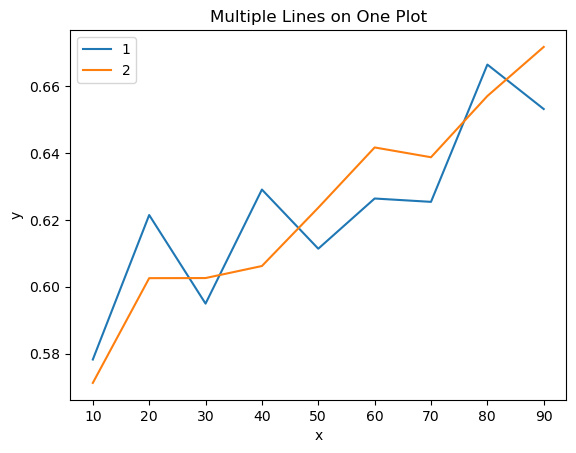

In [3]:
cnt = 1
for dm in list_results:
    x = []
    y = []
    for e in dm.keys():
        if dm[e] != []:
            y.append(np.mean(dm[e]))
            x.append(e)
    plt.plot(x, y, label=cnt)
    cnt += 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Lines on One Plot')

# Add a legend and display the plot
plt.legend()
plt.show()